### K-Means as a baseline instance segmentation

RGB features are augmented with pixel location as additional features via a scaling factor $\omega$. 

In [1]:
import context
import loader 
from loader import guide_function, accuracy, Dice, IOU, DiC, km_cluster
import os
import numpy as np
from matplotlib import pyplot as plt
import PIL.Image as Image
from harmonic import cluster
from harmonic.unet import UNet
from harmonic.embeddings import *
from torch.utils.data import DataLoader

### Data Import
No image augmentation

In [47]:
HeLa_9 = loader.hela('data/HeLa_01_ST/HeLaTrain',test=True)
plant = loader.cvppp('data/A1-train',test=True)
c = plant
train_data = loader.Reader(c.rgb, c.labels, c.edges, 
                           c.transform, c.transform_target)#,loader=loader.gray_loader)

Load image, sample 5 images, calculate  kmeans and BDC result for $\omega$ = 0.2, 0.4, 0.6, 0.8, 1. 

In [44]:
# \omega values 
om = [0,0.05,0.1, 0.15, 0.2]

### Example Image with varying values of $\omega$ 

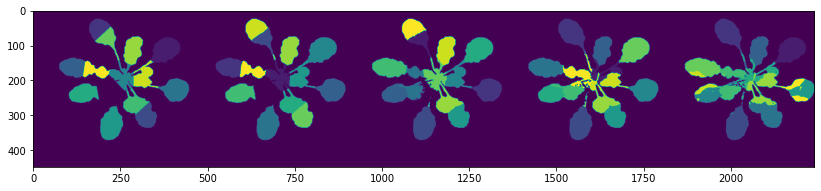

In [48]:
x_ex = train_data[1][0]
y_ex = train_data[1][1]

cc = []
bd = []

plt.figure(figsize=[14,5])

img = np.zeros([int(448*len(om)),448])

for i,o in enumerate(om): 
    c = km_cluster(x_ex,np.clip(y_ex[0],0,1),14,o)
    a = accuracy(c,y_ex[0],Dice)
    img[i*448:(i+1)*448,:] = c
    cc.append(c)
    bd.append(a)
plt.imshow(img.T)
plt.savefig('img/omegas.png',format='png')

In [49]:
bd

[0.7821606519971009,
 0.7839279049077092,
 0.7950849666691533,
 0.8168177102839759,
 0.7214124086784726]

## Evaluation

### Testing Protocol

### 1. Data generator

In [60]:
test = loader.cvppp('data/A1-train',test=True)
c = test
test_data = loader.Reader(c.rgb, c.labels, c.edges, 
                           c.transform, c.transform_target)#,loader=loader.gray_loader)
generator = DataLoader(test_data, batch_size=1, shuffle=True, num_workers=0)

### 2. Metrics

In [66]:
bdscore = []
ious = []
dic = []
for x,y,z in generator:
    xx = x.squeeze(0).squeeze(0).int().numpy()
    yy = y.squeeze(0).squeeze(0).int().numpy()
    
    xx = km_cluster(xx,np.clip(yy,0,1),14,0.2)
    
    bdscore.append(accuracy(xx,yy,Dice))
    #ious.append(accuracy(xx,yy,IOU))
    dic.append(DiC(xx,yy))
print('Done')

Done


In [65]:
np.mean(dic), np.mean(bdscore)

(3.532258064516129, 0.40125760666733545)

## Multiple images, fixed omega 

Done


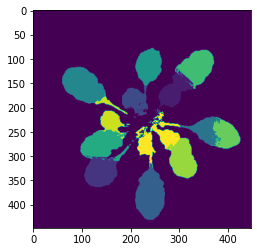

In [59]:
i = 0
for x,y,z in generator:
    
    xx = x.squeeze(0).squeeze(0).int().numpy()
    yy = y.squeeze(0).squeeze(0).int().numpy()
    
    xx = km_cluster(xx,np.clip(yy,0,1),14,0.15)
    if (i > 7): 
        break
    plt.imshow(xx)
    plt.savefig('img/km/'+str(i))
    #ious.append(accuracy(xx,yy,IOU))
    i += 1
print('Done')